# Text Classification
Data comes from BBC articles which are available to download from Kaggle [here](https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification).

The code and workflow is motivated by this excellent article [here](https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568),

In [11]:
import os
from collections import defaultdict
from pathlib import Path

import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

# display multiple outputs in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# cleaning

def func_cleantext(text, re_badsymbols, re_replacespace, stopwords, lemmatise_on = False):
    """
        text: a string
        return: cleansed string
    """
    
    # HTML decoding
    text = BeautifulSoup(text).text 
    text = text.lower()
    text = re_replacespace.sub(' ', text)
    text = re_badsymbols.sub(' ', text)
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    if lemmatise_on == True:
        tokeniser = nltk.tokenize.WhitespaceTokenizer()
        lemmatiser = nltk.stem.WordNetLemmatizer()
        [lemmatiser.lemmatize(word) for word in tokeniser.tokenize(text)]
    
    return text

In [13]:
path_folder = '../data/bbc_classification/bbc'

# list of folders for each BBC article
list_folders = os.listdir(path = path_folder)
list_folders = [e for e in list_folders if e not in {'.DS_Store', 'README.TXT'}]

# nested list of files within each folder
list_files = []
for folder in list_folders:
    files = os.listdir(path = path_folder + '/' + folder + '/')
    list_files.append(files)
    
# intialise dictionary with keys from list_folders an values from list_files
dict_files = dict(zip(list_folders, list_files))

Now have a dictionary, `dict_files` whose:
 - **Keys**: The folder name the data files belong to
 - **Values**: The data files within each of the sub-folders

What we want to do now is load in each text file as a *single-entry* and assign it the `key` from `dict_files` as the classification. This enables us to create a labelled dataset.

In [14]:
# load data in
df_bbc = pd.DataFrame(columns = ['category', 'article_text'])
for folder in list_folders:
    results = defaultdict(list)
    path_dir = path_folder + '/' + folder
    print(path_dir)
    for file in Path(path_dir).iterdir():
        with open(file, 'rb') as file_open:
            results['category'] = folder
            results['article_text'].append(file_open.read())
    df = pd.DataFrame(results)
    df_bbc = df_bbc.append(df)

../data/bbc_classification/bbc/entertainment
../data/bbc_classification/bbc/business
../data/bbc_classification/bbc/sport
../data/bbc_classification/bbc/politics
../data/bbc_classification/bbc/tech


In [15]:
del df, dict_files, file, files, folder, list_files, list_folders, path_dir, path_folder, results

## Pre-processing
Let's start pre-processing our data so that we can have a better dataset to apply models on.

To begin with, let's check our class balances by plotting their counts. As we can see below, the counts of articles we have for each class/category such as *sport*, *business* etc. is relatively balanced.

<AxesSubplot:>

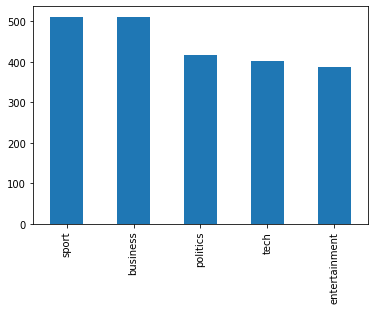

In [16]:
df_bbc['category'].value_counts().plot(kind = 'bar')

In [17]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

df_bbc['article_text_clean'] = df_bbc['article_text'].apply(func = func_cleantext,
                                                            re_badsymbols = BAD_SYMBOLS_RE, 
                                                            re_replacespace = REPLACE_BY_SPACE_RE,
                                                            stopwords = STOPWORDS,
                                                            lemmatise_on = True)

In [18]:
df_bbc.head(10)

,category,article_text,article_text_clean
0,entertainment,b'Musicians to tackle US red tape\n\nMusicians...,musicians tackle us red tape musicians groups ...
1,entertainment,"b'U2\'s desire to be number one\n\nU2, who hav...",u2 desire number one u2 three prestigious gram...
2,entertainment,b'Rocker Doherty in on-stage fight\n\nRock sin...,rocker doherty stage fight rock singer pete do...
3,entertainment,"b""Snicket tops US box office chart\n\nThe film...",snicket tops us box office chart film adaptati...
4,entertainment,b'Ocean\'s Twelve raids box office\n\nOcean\'s...,ocean twelve raids box office ocean twelve cri...
5,entertainment,b'\'Landmark movies\' of 2004 hailed\n\nUS fil...,landmark movies 2004 hailed us film profession...
6,entertainment,b'Pete Doherty misses bail deadline\n\nSinger ...,pete doherty misses bail deadline singer pete ...
7,entertainment,b'Fockers retain film chart crown\n\nComedy Me...,fockers retain film chart crown comedy meet fo...
8,entertainment,b'Top gig award for Scissor Sisters\n\nNew Yor...,top gig award scissor sisters new york band sc...
9,entertainment,b'Johnny Depp: The acting outlaw\n\nJohnny Dep...,johnny depp acting outlaw johnny depp whose la...


In [19]:
# word count
df_bbc['article_text_clean'].apply(lambda x: len(x.split(' '))).sum()

504904

In [20]:
# carry over to other notebook
%store df_bbc

Stored 'df_bbc' (DataFrame)
